# PRÁCTICA FINAL

***Práctica realizada por Luis Calvo, Gonzalo Jiménez y Javier Ramos***

## Librerías e importaciones

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score


In [4]:
data = pd.read_excel("/content/airbnb-listings-cleaned.xlsx")
data

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,0.85,NaN,f,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
1,11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
2,13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,1.00,NaN,t,...,t,f,moderate,f,f,1,1,0,0,1.51
3,13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,1.00,NaN,f,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
4,13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,32135798,none,125368592,James,2017-04-11,CA,within an hour,1.00,NaN,f,...,f,f,flexible,f,f,4,0,4,0,NaN
4833,32151243,none,241187818,Cheung,2019-02-05,CA,NaN,NaN,NaN,f,...,t,f,flexible,f,f,1,1,0,0,NaN
4834,32152929,none,48291360,Craig,2015-11-05,US,within an hour,1.00,NaN,f,...,f,f,flexible,f,f,3,0,3,0,NaN
4835,32160848,none,216510476,Forough,2018-09-21,US,NaN,NaN,NaN,f,...,f,f,flexible,f,f,1,1,0,0,NaN


# **ANALIZAR LOS VALORES NULOS**

In [5]:
data.isnull().sum().sort_values(ascending=False)


host_acceptance_rate            4837
neighbourhood_group_cleansed    4837
square_feet                     4759
weekly_price                    4280
monthly_price                   4245
                                ... 
minimum_maximum_nights             0
maximum_maximum_nights             0
minimum_nights_avg_ntm             0
calendar_updated                   0
id                                 0
Length: 82, dtype: int64

In [6]:
# Calcular la suma de valores nulos y ordenar en orden descendente
result = data.isnull().sum().sort_values(ascending=False)

# Filtrar solo los valores distintos de cero
result = result[result != 0]

# Imprimir el resultado
print(result)


host_acceptance_rate            4837
neighbourhood_group_cleansed    4837
square_feet                     4759
weekly_price                    4280
monthly_price                   4245
host_response_time              2106
host_response_rate              2106
license                         1067
security_deposit                 785
review_scores_value              708
review_scores_location           708
review_scores_checkin            708
review_scores_communication      707
review_scores_accuracy           706
review_scores_cleanliness        705
review_scores_rating             705
reviews_per_month                682
first_review                     682
last_review                      682
host_neighbourhood               585
cleaning_fee                     414
neighbourhood                    286
zipcode                          107
state                             11
host_location                      7
market                             6
beds                               6
c

Al haber datos con valores nulos es necesario tratarlos para poder trabajar de una forma correcta con el data frame

# **TRATAMIENTO DE LOS DATOS**

In [7]:
df2 = data.drop(['experiences_offered',  'street', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'host_acceptance_rate', 'host_name', 'zipcode', 'has_availability', 'is_business_travel_ready', 'license', 'first_review', 'last_review', 'calendar_last_scraped' ], axis=1)
df2.shape

(4837, 64)

Hemos realizado una primera limpieza de los datos eliminando aquellas variables que no nos aportan ningún tipo de información para que se a mas fácil de trabajar en el data frame. Alguna de esas variables eliminadas ha sido debido a que todas las filas tenían el mismo valor o porque no la hemos considerado interesante para trabajar con ellas, pero ninguna aportaba información importante.


In [8]:
df2['host_neighbourhood'] = df2['host_neighbourhood'].fillna("no hay datos")
df2['neighbourhood'] = df2['neighbourhood'].fillna("no hay datos")

Para la variables barrio del host y barrio de la casa se ha sustituido aquellos valores nulos por "no hay datos" ya que no es relevante 

In [9]:
df2['reviews_per_month'] = df2['reviews_per_month'].fillna(df2['reviews_per_month'].mean())
df2['review_scores_value'] = df2['review_scores_value'].fillna(df2['review_scores_value'].mean())
df2['review_scores_location'] = df2['review_scores_location'].fillna(df2['review_scores_location'].mean())
df2['review_scores_checkin'] = df2['review_scores_checkin'].fillna(df2['review_scores_checkin'].mean())
df2['review_scores_communication'] = df2['review_scores_communication'].fillna(df2['review_scores_communication'].mean())
df2['review_scores_accuracy'] = df2['review_scores_accuracy'].fillna(df2['review_scores_accuracy'].mean())
df2['review_scores_cleanliness'] = df2['review_scores_cleanliness'].fillna(df2['review_scores_cleanliness'].mean())
df2['review_scores_rating'] = df2['review_scores_rating'].fillna(df2['review_scores_rating'].mean())
df2['cleaning_fee'] = df2['cleaning_fee'].fillna(df2['cleaning_fee'].mean())
df2['security_deposit'] = df2['security_deposit'].fillna(df2['security_deposit'].mean())
                                                                              

Para las variables continuas tanto las relacionadas con las reviews, como la tasa de limpieza o el depósito de seguridad, se ha decidido sustituir aquellas que no tienen datos por parte de los usuarios por la media para que el dataframe no presente incoherencia

In [10]:
df2.host_response_time.unique()

array(['within a few hours', nan, 'within an hour', 'a few days or more',
       'within a day'], dtype=object)

In [11]:
new_host_response_time = {"within an hour": 1, "within a few hours": 2, "within a day" : 3 , "a few days or more": 4}
df2["host_response_time"] = df2.host_response_time.replace(new_host_response_time)

In [12]:
df2['host_response_time'] = df2['host_response_time'].fillna(df2['host_response_time'].mean())
df2['host_response_rate'] = df2['host_response_rate'].fillna(df2['host_response_rate'].mean())

Para el tiempo de respuesta del host hemos tenido que transformar la variable a númerica dándole el valor 1 a la respuesta en torno a una hora, 2 a la respuesta en torno a varias horas, 3 a un día y 4 a varios días. Despues para los valores nulos se ha decidido calcular la media entre estos todos los resultados.

In [13]:
df2 = df2.drop(['square_feet', 'weekly_price', 'monthly_price'], axis=1)


In [14]:
df2=df2.dropna()

In [15]:
df2.isnull().sum().sort_values(ascending=False)

id                        0
minimum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
                         ..
security_deposit          0
cleaning_fee              0
guests_included           0
extra_people              0
reviews_per_month         0
Length: 61, dtype: int64

Una vez que se han tratado todos los valores nulos existentes, ahroa se transformarán todas las variables necesarias en numéricas.

#**ESTUDIO VARIABLES NUMÉRICAS Y CATEGÓRICAS**

In [16]:
print("los tipos de variables en la base de datos son:")
datos_tipos = pd.DataFrame(df2.dtypes)
datos_tipos = datos_tipos.rename(columns = {0: "Tipo de variable"})
datos_tipos

los tipos de variables en la base de datos son:


,Tipo de variable
id,int64
host_id,int64
host_since,datetime64[ns]
host_location,object
host_response_time,float64
...,...
calculated_host_listings_count,int64
calculated_host_listings_count_entire_homes,int64
calculated_host_listings_count_private_rooms,int64
calculated_host_listings_count_shared_rooms,int64


In [17]:
df2['host_since_modified'] = pd.to_datetime(df2['host_since']). apply(lambda x: x.date())
df2['host_since_days'] =pd.to_numeric((dt.date(2023, 6, 10)- (df2['host_since_modified'])).dt.days)
df2=df2.drop(['host_since_modified'], axis=1)
df2=df2.drop(['host_since'], axis=1)

In [18]:
df2.host_since_days

0       5052
1       5001
2       4966
3       4963
4       4963
        ... 
4832    2251
4833    1586
4834    2774
4835    1723
4836    2995
Name: host_since_days, Length: 4822, dtype: int64

In [19]:
df2.host_is_superhost.unique()

array(['f', 't'], dtype=object)

In [20]:
new_host_is_superhost = {"f": 1, "t": 2}
df2["host_is_superhost"] = df2.host_is_superhost.replace(new_host_is_superhost)

In [21]:
df2.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [22]:
new_host_has_profile_pic = {"f": 1, "t": 2}
df2["host_has_profile_pic"] = df2.host_has_profile_pic.replace(new_host_has_profile_pic)

In [23]:
df2.host_identity_verified.unique()

array(['t', 'f'], dtype=object)

In [24]:
new_host_identity_verified = {"f": 1, "t": 2}
df2["host_identity_verified"] = df2.host_identity_verified.replace(new_host_identity_verified)

In [25]:
new_room_type = {"Entire home/apt": 1, "Private room": 2, "Shared room":3}
df2["room_type"] = df2.room_type.replace(new_room_type)

In [26]:
df2.host_has_profile_pic.unique()

array([2, 1])

In [27]:
df2.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [28]:
new_bed_type = {"Real Bed": 1, "Futon": 2, "Pull-out Sofa":3, "Airbed":4, "Couch":5}
df2["bed_type"] = df2.bed_type.replace(new_bed_type)

In [29]:
df2.instant_bookable.unique()

array(['f', 't'], dtype=object)

In [30]:
new_instant_bookable = {"f": 1, "t": 2}
df2["instant_bookable"] = df2.instant_bookable.replace(new_instant_bookable)

In [31]:
df2.require_guest_profile_picture.unique()

array(['f', 't'], dtype=object)

In [32]:
new_require_guest_profile_picture = {"f": 1, "t": 2}
df2["require_guest_profile_picture"] = df2.require_guest_profile_picture.replace(new_require_guest_profile_picture)

In [33]:
df2.require_guest_phone_verification.unique()

array(['f', 't'], dtype=object)

In [34]:
new_require_guest_phone_verification = {"f": 1, "t": 2}
df2["require_guest_phone_verification"] = df2.require_guest_phone_verification.replace(new_require_guest_phone_verification)

In [35]:
df2['extra_people'] = df2['extra_people'].str.strip("$ ")
df2.extra_people.astype('float64')

0        0.0
1        0.0
2        0.0
3       33.0
4        0.0
        ... 
4832     0.0
4833     0.0
4834     0.0
4835     0.0
4836     0.0
Name: extra_people, Length: 4822, dtype: float64

In [36]:
df2.calendar_updated.unique()

array(['today', '10 months ago', '5 days ago', '4 weeks ago',
       '5 weeks ago', '2 months ago', '5 months ago', '3 months ago',
       '6 weeks ago', '2 weeks ago', 'a week ago', '3 weeks ago',
       '16 months ago', '4 days ago', '3 days ago', '2 days ago',
       '4 months ago', 'yesterday', '6 months ago', '7 weeks ago',
       '9 months ago', '11 months ago', '25 months ago', '7 months ago',
       '1 week ago', '32 months ago', '6 days ago', '13 months ago',
       '18 months ago', '8 months ago', '19 months ago', '12 months ago',
       '24 months ago', '17 months ago', '34 months ago', '22 months ago',
       '33 months ago', '36 months ago', '20 months ago', '44 months ago',
       '29 months ago', '37 months ago', '39 months ago', '21 months ago',
       '31 months ago', '30 months ago', '14 months ago', '15 months ago'],
      dtype=object)

In [37]:
new_calendar_updated = {"today": 0, "10 months ago": 300, '5 days ago': 5, '4 weeks ago': 28, '5 weeks ago':35, '2 months ago':20 , '5 months ago': 150, '3 months ago':90, '6 weeks ago':42, '2 weeks ago':14, 'a week ago':7, '3 weeks ago':21,
       '16 months ago':480 , '4 days ago':4,'3 days ago':3, '2 days ago':2,
       '4 months ago':120, 'yesterday':1, '6 months ago':180, '7 weeks ago':49,
       '9 months ago':270, '11 months ago':330, '25 months ago':750, '7 months ago':210,
       '1 week ago':7, '32 months ago': 960, '6 days ago':6, '13 months ago':390,
       '18 months ago':540, '8 months ago':240, '19 months ago':570, '12 months ago':360,
       '24 months ago':720, '17 months ago':510, '34 months ago':1020, '22 months ago':660,
       '33 months ago':990, '36 months ago':1080, '20 months ago':600, '44 months ago':1320,
       '29 months ago':870, '37 months ago':1110, '39 months ago':1170, '21 months ago':630,
       '31 months ago':930, '30 months ago':900, '14 months ago':420, '15 months ago':450  }
df2["calendar_updated"] = df2.calendar_updated.replace(new_calendar_updated)

Para cada una de estas variables anteriores se ha seguido el mismo procedimiento, se ha transformado las variables object en numericas asignando un número a cada una de las distintas categorías para esa variable para transformarlas en float o string y poder trabajar con ellas

In [38]:
le = LabelEncoder()

print(df2.host_location.unique())
df2['host_location'] = le.fit_transform(df2['host_location'].astype(str))
print(df2.host_location.unique())


['Vancouver, British Columbia, Canada' 'CA'
 'Burnaby, British Columbia, Canada' 'Richmond, British Columbia, Canada'
 'Vancouver, Washington, United States'
 'North Vancouver, British Columbia, Canada'
 'Port Coquitlam, British Columbia, Canada'
 'Abbotsford, British Columbia, Canada' 'Lethbridge, Alberta, Canada'
 'Sunshine Coast, BC' 'Langley, British Columbia, Canada'
 'Mission, British Columbia, Canada' 'Surrey, British Columbia, Canada'
 'Rancho Palos Verdes, California, United States'
 'West Vancouver, British Columbia, Canada'
 'Port Moody, British Columbia, Canada'
 'Bellingham, Washington, United States' 'Paris, ï¿½_le-de-France, France'
 'Canada' 'Stuttgart, Baden-Wï¿½_rttemberg, Germany'
 'Coquitlam, British Columbia, Canada'
 'Whistler, British Columbia, Canada'
 'Los Angeles, California, United States' 'Edmonton, Alberta, Canada'
 'Inuvik, Northwest Territories, Canada'
 'Maple Ridge, British Columbia, Canada'
 'Seattle, Washington, United States' 'British Columbia'
 'Can

In [39]:
print(df2.host_neighbourhood.unique())
df2['host_neighbourhood'] = le.fit_transform(df2['host_neighbourhood'].astype(str))
print(df2.host_neighbourhood.unique())

['Coal Harbour' 'Riley Park' 'Chinatown' 'Downtown Vancouver'
 'Kensington-Cedar Cottage' 'Hastings-Sunrise' 'Commercial Drive'
 'Renfrew-Collingwood' 'Mount Pleasant' 'West End' 'Kitsilano'
 'Grandview-Woodland' 'Downtown Eastside' 'Arbutus Ridge' 'Fraserview'
 'Dunbar-Southlands' 'Strathcona' 'Gastown' 'Yaletown' 'Marpole'
 'Fairview' 'South Cambie' 'Shaughnessy'
 'Point Grey/University of British Columbia' 'Killarney' 'Oakridge'
 'Kerrisdale' 'no hay datos' 'Burnaby' 'West Hill' 'LB of Camden'
 'Lahaina' 'Mission Beach' 'Downtown Montreal'
 'District of North Vancouver' 'Cannes' 'Richmond' 'Kihei/Wailea'
 'West Hollywood' 'Ubud' 'Waikiki' 'San Telmo' 'Silver Lake' 'Hollywood'
 'Niagara' 'Lev HaIr' 'Fashion District' 'Hipï¿½_dromo' 'Itaewon'
 'Haller Lake']
[ 4 37  3  9 21 17  5 35 31 45 25 15  7  0 13 10 42 14 48 29 11 41 39 34
 24 33 22 49  1 46 26 27 30  8  6  2 36 23 47 43 44 38 40 19 32 28 12 18
 20 16]


In [40]:
print(df2.host_response_time.unique())
df2['host_response_time'] = le.fit_transform(df2['host_response_time'].astype(str))
print(df2.host_response_time.unique())

[2.         1.37861589 1.         4.         3.        ]
[2 1 0 4 3]


In [41]:
print(df2.neighbourhood.unique())
df2['neighbourhood'] = le.fit_transform(df2['neighbourhood'].astype(str))
print(df2.neighbourhood.unique())

['Coal Harbour' 'Riley Park' 'Chinatown' 'Downtown Vancouver'
 'Kensington-Cedar Cottage' 'Hastings-Sunrise' 'Commercial Drive'
 'Renfrew-Collingwood' 'Mount Pleasant' 'West End' 'Fairview'
 'no hay datos' 'Downtown Eastside' 'Arbutus Ridge' 'Fraserview'
 'Grandview-Woodland' 'Dunbar-Southlands' 'Kitsilano' 'Strathcona'
 'Gastown' 'Yaletown' 'Marpole' 'Killarney' 'South Cambie'
 'Point Grey/University of British Columbia' 'Oakridge' 'Shaughnessy'
 'Kerrisdale' 'Burnaby']
[ 3 22  2  6 13 12  4 21 18 26  8 28  5  0  9 11  7 16 25 10 27 17 15 24
 20 19 23 14  1]


In [42]:
print(df2.neighbourhood_cleansed.unique())
df2['neighbourhood_cleansed'] = le.fit_transform(df2['neighbourhood_cleansed'].astype(str))
print(df2.neighbourhood_cleansed.unique())

['Downtown' 'Riley Park' 'Downtown Eastside' 'West End'
 'Kensington-Cedar Cottage' 'Hastings-Sunrise' 'Grandview-Woodland'
 'Renfrew-Collingwood' 'Mount Pleasant' 'Fairview' 'Kitsilano'
 'Arbutus Ridge' 'Sunset' 'Dunbar Southlands' 'Marpole' 'Killarney'
 'Shaughnessy' 'South Cambie' 'Strathcona' 'West Point Grey' 'Oakridge'
 'Kerrisdale' 'Victoria-Fraserview']
[ 1 15  2 21  7  6  5 14 12  4 10  0 19  3 11  9 16 17 18 22 13  8 20]


In [43]:
print(df2.is_location_exact.unique())
df2['is_location_exact'] = le.fit_transform(df2['is_location_exact'].astype(str))
print(df2.is_location_exact.unique())

['t' 'f']
[1 0]


In [44]:
print(df2.property_type.unique())
df2['property_type'] = le.fit_transform(df2['property_type'].astype(str))
print(df2.property_type.unique())

['Condominium' 'House' 'Apartment' 'Guest suite' 'Townhouse' 'Loft'
 'Serviced apartment' 'Tiny house' 'Guesthouse' 'Bed and breakfast'
 'Boutique hotel' 'Bungalow' 'Other' 'Cabin' 'Villa' 'Hotel' 'Cottage'
 'Camper/RV' 'Resort' 'Farm stay' 'Barn' 'Timeshare' 'Aparthotel']
[ 8 14  1 11 21 15 18 20 12  3  4  5 16  6 22 13  9  7 17 10  2 19  0]


In [45]:
print(df2.cancellation_policy.unique())
df2['cancellation_policy'] = le.fit_transform(df2['cancellation_policy'].astype(str))
print(df2.cancellation_policy.unique())

['strict_14_with_grace_period' 'moderate' 'flexible' 'super_strict_30']
[2 1 0 3]


In [46]:
print(df2.requires_license.unique())
df2['requires_license'] = le.fit_transform(df2['requires_license'].astype(str))
print(df2.requires_license.unique())

['t' 'f']
[1 0]


In [47]:
df2['extra_people'] = le.fit_transform(df2['extra_people'].astype(str))
print(df2.extra_people.unique())

[ 0 39 13 56  1 22 24 17 29 63 53 31 49 57 35 40 68 28 47 75 32 55 69 33
 11 50  2 72 38  8 41 45 44 18  3 26 66  6 58 16 23 52 60 73 19 67 37 42
 76 43 62 71 34 27 21 30  5 12 65 77 15 59 25 74  9 14 79 64 20 70 46 78
 48  7 61 54 10 36 51  4]


In [48]:
print("los tipos de variables en la base de datos son:")
df2_tipos = pd.DataFrame(df2.dtypes)
df2_tipos = df2_tipos.rename(columns = {0: "Tipo de variable"})
df2_tipos

los tipos de variables en la base de datos son:


,Tipo de variable
id,int64
host_id,int64
host_location,int64
host_response_time,int64
host_response_rate,float64
...,...
calculated_host_listings_count_entire_homes,int64
calculated_host_listings_count_private_rooms,int64
calculated_host_listings_count_shared_rooms,int64
reviews_per_month,float64


id                                                       int64
experiences_offered                                     object
host_id                                                  int64
host_name                                               object
host_since                                      datetime64[ns]
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 82, dtype: object


<Axes: >

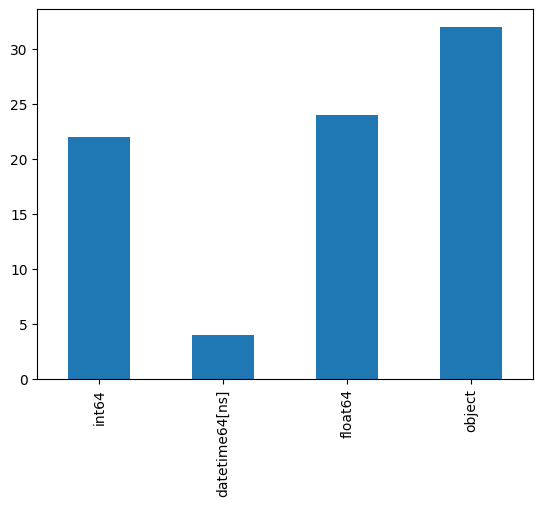

In [49]:
tipos = data.dtypes
print(tipos)
tipos.groupby(tipos.values).count().plot.bar()

id                                                int64
host_id                                           int64
host_location                                     int64
host_response_time                                int64
host_response_rate                              float64
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
host_since_days                                   int64
Length: 61, dtype: object


<Axes: >

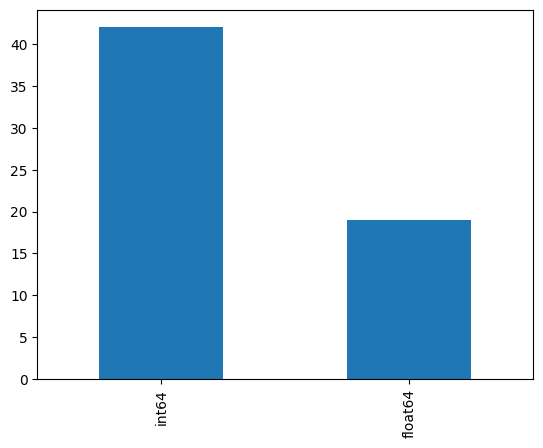

In [50]:
tipos = df2.dtypes
print(tipos)
tipos.groupby(tipos.values).count().plot.bar()

Tras el tratamiento de los datos podemos ver como hemos transformado todas las variables que se dividían en 4 grupos (int64, datetime64, float64 y object) a int64 y float64, para un posterior análisis detallado de todas ellas.


#**ESTUDIO VARIABLE OBJETIVO**

In [51]:
def boxploteo(alpha, bravo, charlie):
  plt.figure(figsize=(15,5))
  chart=sns.boxplot(x=alpha, y=bravo, data=charlie, showfliers=False)
  rotete=chart.set_xticklabels(chart.get_xticklabels(), rotation=40)

##**Diagramas de Caja y Bigotes**

**Boxplot del precio en relación al tipo de casa**

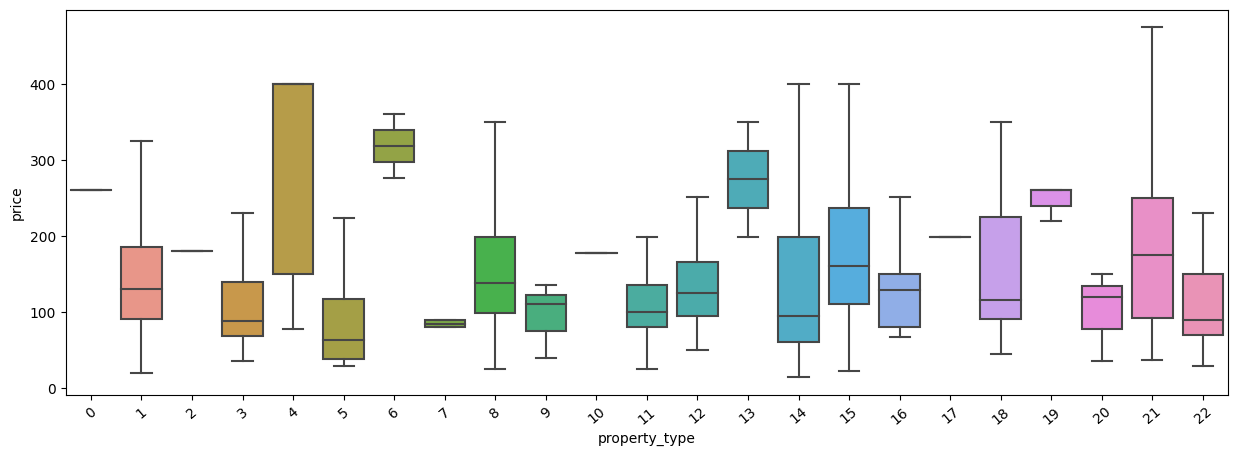

In [52]:
df_boxplot_property_type = pd.DataFrame(data={"price": df2["price"], "property_type": df2["property_type"]})

boxploteo("property_type", "price", df_boxplot_property_type)

En este boxplot se puede observar el precio respecto al tipo de casa, destacando dos tipos de casa como Autocaravana (7) y resort con tan solo 4 y 1 registro respectivamente. Por otro lado, los Bungalows (5) y los Bed and Breakfast () son los tipos de casa más baratos.

Como realizamos anteriormente en la transformación estos son los valores para cada categoría:['Condominium' 'House' 'Apartment' 'Guest suite' 'Townhouse' 'Loft'
 'Serviced apartment' 'Tiny house' 'Guesthouse' 'Bed and breakfast'
 'Boutique hotel' 'Bungalow' 'Other' 'Cabin' 'Villa' 'Hotel' 'Cottage'
 'Camper/RV' 'Resort' 'Farm stay' 'Barn' 'Timeshare' 'Aparthotel']
[ 8 , 14 , 1, 11, 21, 15, 18, 20, 12,  3,  4,  5, 16,  6, 22, 13,  9, 7, 17, 10, 2, 19,  0]

**Boxplot del precio en relación al vecindario**

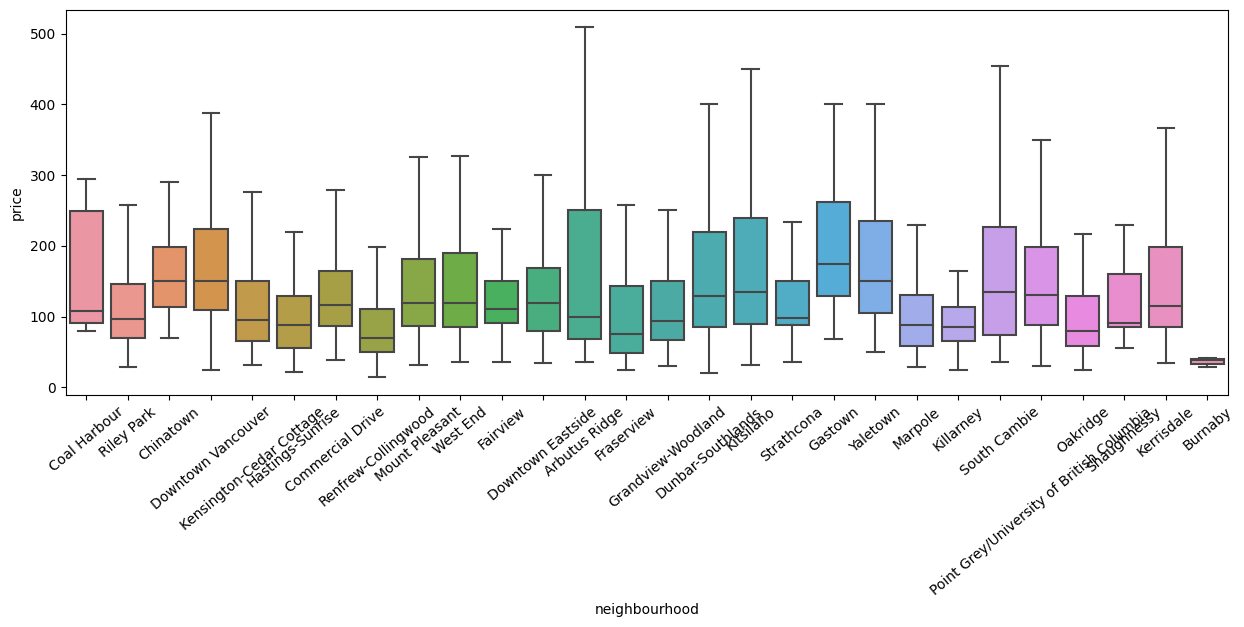

In [53]:
df_boxplot_neighbourhood = pd.DataFrame(data={"price": data["price"], "neighbourhood": data["neighbourhood"]})

boxploteo("neighbourhood", "price", df_boxplot_neighbourhood)

En cuanto al precio por vecindario, se pude observar como los barrios más caros son Downtown Eastside, South Cambie y Kitsilano. 

**Boxplot del precio en relación a las habitaciones**

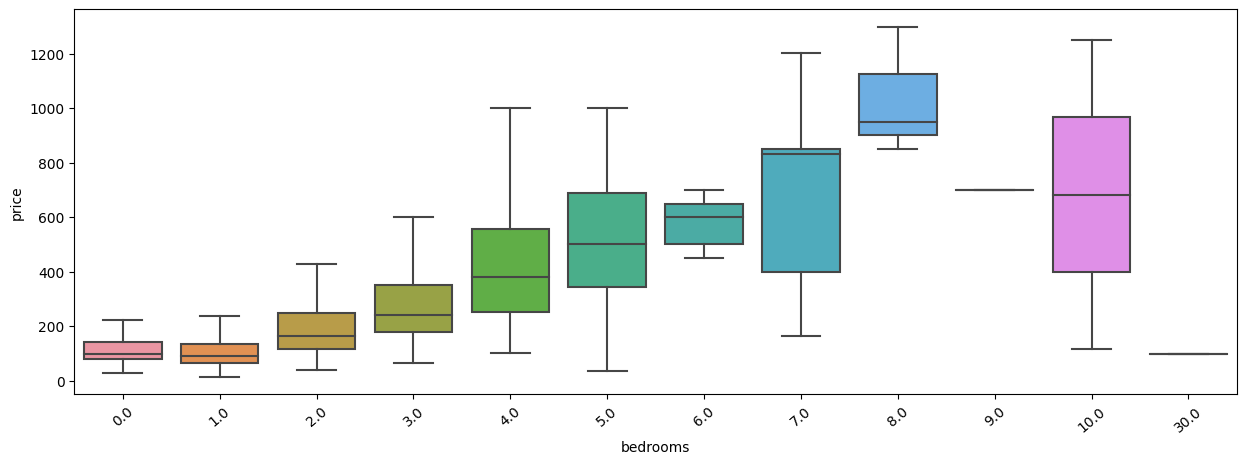

In [54]:
df_boxplot_bedrooms = pd.DataFrame(data={"price": data["price"], "bedrooms": data["bedrooms"]})

boxploteo("bedrooms", "price", df_boxplot_bedrooms)

Observando estos boxplots podemos apreciar dos de ellos, que no los tendremos en cuenta ya que son 3 registros que no aportan gran información. No obstante, los que tienen 7 o más habitaciones son los más caros, destacando los de 8. Por supuesto los de 2 o menos son los más baratos.

##**Correlación**

**Correlación precio con número de habitaciones, dormitorios, camas y baños**


In [55]:
df2_correlacion = pd.DataFrame(df2["bedrooms"])
df2_correlacion["accommodates"] = df2["accommodates"]
df2_correlacion["beds"] = df2["beds"]
df2_correlacion["bathrooms"] = df2["bathrooms"]
df2_correlacion["price"] = df2["price"]
df2_correlacion

,bedrooms,accommodates,beds,bathrooms,price
0,2.0,6,4.0,2.0,295.0
1,1.0,1,1.0,1.0,60.0
2,0.0,4,2.0,1.0,119.0
3,2.0,4,2.0,2.0,151.0
4,1.0,2,1.0,1.0,119.0
...,...,...,...,...,...
4832,0.0,1,1.0,1.0,43.0
4833,2.0,6,2.0,2.5,300.0
4834,1.0,2,1.0,1.5,39.0
4835,1.0,2,1.0,1.0,129.0


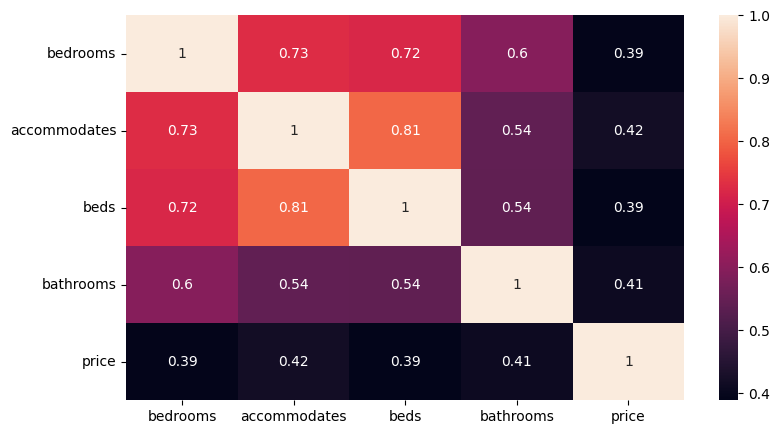

In [56]:
f, (ax_corr) = plt.subplots(1, sharex=True,figsize=(9,5))
correlation_mat = df2_correlacion.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True, ax = ax_corr)
plt.show()

Basándonos en los coeficientes de correlación, podemos extraer las siguientes conclusiones.

En primer lugar, Las variables habitaciones, dormitorios, camas y baños muestran una correlación moderada con la variable objetivo price. Los coeficientes de correlación de 0.34, 0.4, 0.36 y 0.39 respectivamente indican que existe una relación positiva entre estas variables y el precio. Esto implica que a medida que aumentan el número de habitaciones, la capacidad de alojamiento, las camas y los baños, es probable que el precio también aumente en cierta medida.

Por último, los resultados indican que estas variables están moderadamente correlacionadas con el precio así como entre ellas mismas con coeficientes de correlación entre el 0.61 y 0.86 sugiriendo que también tienen cierta relación entre estas variables. 

#ESTANDARIZACIÓN DE LOS DATOS

In [57]:
scaler = StandardScaler()

In [58]:
# Definir variable objetivo y variables predictoras
y = df2["price"]
X = df2.drop("price", axis=1)


# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

prop_train = y_train.value_counts(normalize=True)
prop_test = y_test.value_counts(normalize=True)
print('\nProporción en conjunto de entrenamiento:\n', prop_train)
print('\nProporción en conjunto de prueba:\n', prop_test)


Proporción en conjunto de entrenamiento:
 150.0    0.049261
199.0    0.039150
98.0     0.033705
100.0    0.030853
119.0    0.027742
           ...   
576.0    0.000259
339.0    0.000259
226.0    0.000259
625.0    0.000259
611.0    0.000259
Name: price, Length: 294, dtype: float64

Proporción en conjunto de prueba:
 100.0    0.042487
150.0    0.041451
70.0     0.033161
80.0     0.030052
91.0     0.026943
           ...   
579.0    0.001036
530.0    0.001036
178.0    0.001036
96.0     0.001036
370.0    0.001036
Name: price, Length: 190, dtype: float64


Podemos ver que la distrubución de la variable objetivo se mantiene con respecto a la distribución inicial. Para poder seguir avanzando, se dividen los datos en dos conjuntos, el de entrenamiento y el de prueba (train y test) con un tamaño del test del 20%

#**MODELOS**

##**Regresión lineal**

In [59]:
# Crear una instancia del modelo de regresión lineal
linear_model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Predecir los valores de la variable objetivo para los datos de prueba
y_pred_linear = linear_model.predict(X_test)

# Obtener la puntuación R2 del modelo
r2_score = linear_model.score(X_test, y_test)

# Imprimir la puntuación R2
print("Puntuación R2: ", r2_score)

Puntuación R2:  0.409523811897161


En este caso, el valor de la puntuación R2 en la regresión lineal es de 0.4095, lo que indica que el modelo explica aproximadamente el 40.95% de la variabilidad de la variable objetivo en los datos de prueba. Un valor más cercano a 1 indicaría una mejor capacidad de predicción del modelo. 

## **Regresión Logística**

In [60]:
# Escalar las variables predictoras
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo
lr = LogisticRegression(random_state=52)
lr.fit(X_train, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_lr = lr.predict(X_train)
print("Regresión Logística - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_lr))
print("Precision: ", precision_score(y_train, y_pred_train_lr, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_lr, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_lr, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_lr))

# Mostrar el rendimiento del modelo en el conjunto de prueba
y_pred_test_lr = lr.predict(X_test)
print("Regresión Logística - Conjunto de Prueba")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_lr))
print("Precision: ", precision_score(y_test, y_pred_test_lr, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_lr, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_lr, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_lr))


Regresión Logística - Conjunto de Entrenamiento
Accuracy:  0.2875291677469536
Precision:  0.3134469422724764
Recall:  0.2875291677469536
F1 Score:  0.2819765506965593
Confusion Matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Regresión Logística - Conjunto de Prueba
Accuracy:  0.07564766839378238
Precision:  0.07086948076119506
Recall:  0.07564766839378238
F1 Score:  0.0671507782545464
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

En el modelo de regresión logística, hemos utilizado la métrica de Accuracy, Precision, Recall y F1 Score para evaluar el rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En el conjunto de entrenamiento, se obtuvo un Accuracy de 0.2875, lo que indica que el modelo ha clasificado correctamente alrededor del 28.75% de las muestras de entrenamiento. El Precision, Recall y F1 Score tienen valores similares, lo que sugiere un rendimiento balanceado en términos de precisión, exhaustividad y equilibrio entre ambas en la clasificación.

En el conjunto de prueba, el Accuracy obtenido es de 0.0756, lo que indica que el modelo ha clasificado correctamente aproximadamente el 7.56% de las muestras de prueba. El Precision, Recall y F1 Score también son muy bajos, lo que sugiere que el modelo tiene dificultades para generalizar a nuevos datos y tiene un rendimiento deficiente en la clasificación en el conjunto de prueba.



## **KNN**

In [61]:
# KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
print("K-NN - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_knn))
print("Precision: ", precision_score(y_train, y_pred_train_knn, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_knn, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_knn, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_knn))


y_pred_test_knn = knn.predict(X_test)
print("\nK-NN - Conjunto de Prueba")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_knn))
print("Precision: ", precision_score(y_test, y_pred_test_knn, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_knn, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_knn, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_knn))

K-NN - Conjunto de Entrenamiento
Accuracy:  0.26575058335493906
Precision:  0.2633924061217459
Recall:  0.26575058335493906
F1 Score:  0.23927007736623365
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

K-NN - Conjunto de Prueba
Accuracy:  0.05906735751295337
Precision:  0.055742696710785605
Recall:  0.05906735751295337
F1 Score:  0.05133981999713698
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En el modelo de KNN, hemos utilizado la métrica de Accuracy, Precision, Recall y F1 Score para evaluar el rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En el conjunto de entrenamiento, se obtuvo un Accuracy de 0.2658, lo que indica que el modelo ha clasificado correctamente aproximadamente el 26.58% de las muestras de entrenamiento. El Precision, Recall y F1 Score también son relativamente bajos, lo que sugiere un rendimiento limitado en términos de precisión, exhaustividad y equilibrio entre ambas en la clasificación.

En el conjunto de prueba, el Accuracy obtenido es de 0.0591, lo que indica que el modelo ha clasificado correctamente aproximadamente el 5.91% de las muestras de prueba. El Precision, Recall y F1 Score también son muy bajos, lo que sugiere que el modelo tiene dificultades para generalizar a nuevos datos y tiene un rendimiento deficiente en la clasificación en el conjunto de prueba.

Observando las matrices de confusión para ambos conjuntos, se puede notar que las predicciones son mayormente cero, lo que puede indicar un desequilibrio en los datos o posibles dificultades en la clasificación correcta.

##**Bagging Clasifier**

In [62]:
#Bagging Classifier

# Entrenar el modelo
bc = BaggingClassifier(random_state=42)
bc.fit(X_train, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_bc = bc.predict(X_train)
print("Bagging Classifier - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_bc))
print("Precision: ", precision_score(y_train, y_pred_train_bc, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_bc, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_bc, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_bc))

# Evaluar el modelo en el conjunto de test
y_pred_test_bc = bc.predict(X_test)
print("Bagging Classifier - Conjunto de Prueba")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_bc))
print("Precision: ", precision_score(y_test, y_pred_test_bc, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_bc, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_bc, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_bc))


Bagging Classifier - Conjunto de Entrenamiento
Accuracy:  0.9937775473165673
Precision:  0.9937994381955867
Recall:  0.9937775473165673
F1 Score:  0.9936351446601331
Confusion Matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Bagging Classifier - Conjunto de Prueba
Accuracy:  0.09119170984455958
Precision:  0.0865106875021994
Recall:  0.09119170984455958
F1 Score:  0.08289901879117233
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En el modelo Bagging Classifier, hemos utilizado la métrica de Accuracy, Precision, Recall y F1 Score para evaluar el rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En el conjunto de entrenamiento, se obtuvo un Accuracy de 0.9938, lo que indica que el modelo ha clasificado correctamente aproximadamente el 99.38% de las muestras de entrenamiento. El Precision, Recall y F1 Score también son muy altos, lo que sugiere un rendimiento excelente en términos de precisión, exhaustividad y equilibrio entre ambas en la clasificación.

En el conjunto de prueba, el Accuracy obtenido es de 0.0912, lo que indica que el modelo ha clasificado correctamente aproximadamente el 9.12% de las muestras de prueba. El Precision, Recall y F1 Score también son muy bajos, lo que sugiere que el modelo tiene dificultades para generalizar a nuevos datos y tiene un rendimiento deficiente en la clasificación en el conjunto de prueba.

Observando las matrices de confusión para ambos conjuntos, se puede notar que las predicciones son mayormente cero, lo que puede indicar un desequilibrio en los datos o posibles dificultades en la clasificación correcta.

##**Random Forest**

In [63]:
#Random Forest

# Entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_rf = rf.predict(X_train)
print("Random Forest - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_rf))
print("Precision: ", precision_score(y_train, y_pred_train_rf, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_rf, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_rf, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_rf))

# Evaluar el modelo en el conjunto de test
y_pred_test_rf = rf.predict(X_test)
print("Random Forest - Conjunto de Prueba")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_rf))
print("Precision: ", precision_score(y_test, y_pred_test_rf, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_rf, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_rf, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_rf))

Random Forest - Conjunto de Entrenamiento
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Random Forest - Conjunto de Prueba
Accuracy:  0.12227979274611399
Precision:  0.12530212080215014
Recall:  0.12227979274611399
F1 Score:  0.11102038266322534
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En el modelo Random Forest, hemos utilizado las métricas de Accuracy, Precision, Recall y F1 Score para evaluar el rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En el conjunto de entrenamiento, se obtuvo un Accuracy de 1.0, lo que indica que el modelo ha clasificado correctamente el 100% de las muestras de entrenamiento. El Precision, Recall y F1 Score también son 1.0, lo que sugiere un rendimiento excelente en términos de precisión, exhaustividad y equilibrio entre ambas en la clasificación. Sin embargo, es importante tener en cuenta que un Accuracy de 1.0 en el conjunto de entrenamiento puede indicar un posible sobreajuste del modelo a los datos de entrenamiento.

En el conjunto de prueba, el Accuracy obtenido es de 0.1223, lo que indica que el modelo ha clasificado correctamente aproximadamente el 12.23% de las muestras de prueba. El Precision, Recall y F1 Score también son bajos, lo que sugiere que el modelo tiene dificultades para generalizar a nuevos datos y tiene un rendimiento deficiente en la clasificación en el conjunto de prueba. Al igual que en el conjunto de entrenamiento, estos resultados pueden indicar un posible sobreajuste del modelo a los datos de entrenamiento.

##**Gradient Boosting**

In [64]:
# Entrenar el modelo
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_gb = gb.predict(X_train)
print("Gradient Boosting - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_gb))
print("Precision: ", precision_score(y_train, y_pred_train_gb, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_gb, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_gb, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_gb))

# Mostrar el rendimiento del modelo en el conjunto de test
y_pred_test_gb = gb.predict(X_test)
print("\nGradient Boosting - Conjunto de Prueba")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_gb))
print("Precision: ", precision_score(y_test, y_pred_test_gb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_gb, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_gb, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_gb))

Gradient Boosting - Conjunto de Entrenamiento
Accuracy:  0.8750324086077262
Precision:  0.8983210276181237
Recall:  0.8750324086077262
F1 Score:  0.879234378037262
Confusion Matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gradient Boosting - Conjunto de Prueba
Accuracy:  0.07772020725388601
Precision:  0.09002452740442583
Recall:  0.07772020725388601
F1 Score:  0.07524869291620893
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En el modelo de Regresión Logística, hemos utilizado la métrica de Accuracy, Precision, Recall y F1 Score para evaluar el rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En el conjunto de entrenamiento, se obtuvo un Accuracy de 0.875, lo que indica que el modelo ha clasificado correctamente alrededor del 87.5% de las muestras de entrenamiento. El Precision, Recall y F1 Score tienen valores similares, lo que sugiere un rendimiento balanceado en términos de precisión, exhaustividad y equilibrio entre ambas en la clasificación.

En el conjunto de prueba, el Accuracy obtenido es de 0.0777, lo que indica que el modelo ha clasificado correctamente aproximadamente el 7.77% de las muestras de prueba. El Precision, Recall y F1 Score también son muy bajos, lo que sugiere que el modelo tiene dificultades para generalizar a nuevos datos y tiene un rendimiento deficiente en la clasificación en el conjunto de prueba.

#**COMPARACIÓN MODELOS**

##**Datos Test**

In [66]:
# Creamos un diccionario con los datos de cada algoritmo
datos = {
    "Regresión Logística": {
        "Accuracy": 0.076,
        "Precision": 0.071,
        "Recall": 0.076,
        "F1 Score": 0.067,
         },
    "K-NN": {
        "Accuracy": 0.059,
        "Precision": 0.056,
        "Recall": 0.059,
        "F1 Score": 0.051,
        
    },
    "Bagging Classifier": {
        "Accuracy": 0.091,
        "Precision": 0.087,
        "Recall": 0.091,
        "F1 Score": 0.083,
        
    },
    "Random Forest": {
        "Accuracy": 0.122,
        "Precision": 0.125,
        "Recall": 0.122,
        "F1 Score": 0.111,
        
    },
    "GradientBoost": {
        "Accuracy": 0.078,
        "Precision": 0.090,
        "Recall": 0.078,
        "F1 Score": 0.075,
        
    }
}

# Creamos el dataframe
df = pd.DataFrame.from_dict(datos, orient="index")
df = df[["Accuracy", "Precision", "Recall", "F1 Score"]]

# Imprimimos el dataframe
print(df)

                     Accuracy  Precision  Recall  F1 Score
Regresión Logística     0.076      0.071   0.076     0.067
K-NN                    0.059      0.056   0.059     0.051
Bagging Classifier      0.091      0.087   0.091     0.083
Random Forest           0.122      0.125   0.122     0.111
GradientBoost           0.078      0.090   0.078     0.075


Empezaremos comentando los datos del test donde se analizara primero rápidamente de forma individual y luego se comparará entre los distintos modelos.


La *regresión logística* tiene una precisión y recall bastante bajos, lo que indica que el modelo tiene dificultades para clasificar correctamente las muestras. El bajo F1-Score también muestra que el modelo tiene un desempeño deficiente en términos de precisión y recall.

El *modelo K-NN* muestra resultados aún más bajos que la regresión logística en términos de precisión, recall y F1-Score. Esto indica que el modelo tiene dificultades para generalizar y clasificar correctamente las muestras.

El *Bagging Classifier* muestra una ligera mejora en comparación con los dos modelos anteriores. Sin embargo, los resultados aún no son muy satisfactorios, con una precisión y recall relativamente bajos. El F1-Score también muestra que el modelo tiene dificultades para equilibrar precisión y recall.

El modelo *Random Forest* muestra una mejora en comparación con los modelos anteriores. Tiene una precisión y recall más altos, lo que indica una capacidad mejorada para clasificar correctamente las muestras. Sin embargo, el F1-Score sigue siendo relativamente bajo, lo que sugiere que hay margen de mejora.

El modelo *Gradient Boost* también muestra una precisión y recall más altos en comparación con la regresión logística y K-NN. Sin embargo, el F1-Score sigue siendo bajo, lo que indica que el modelo aún tiene dificultades para equilibrar precisión y recall.

----

Ahora, realizamos la comparación entre los modelos:

En términos de precisión, Bagging Classifier tiene el valor más alto, seguido de Random Forest y Gradient Boost. Regresión Logística y K-NN tienen los valores más bajos.

En cuanto a recall, Bagging Classifier tiene el valor más alto, seguido de Random Forest y Regresión Logística. K-NN tiene el valor más bajo.

El modelo con el F1-Score más alto es Random Forest, seguido de Bagging Classifier y Gradient Boost. Regresión Logística y K-NN tienen los valores más bajos.

En general, podemos observar que Random Forest y Bagging Classifier muestran un rendimiento ligeramente mejor en comparación con los otros modelos. Sin embargo, todos los modelos tienen un rendimiento general bajo, lo que sugiere que se pueden realizar mejoras en la clasificación de las muestras.

##**Datos Train**

In [67]:
# Creamos un diccionario con los datos de cada algoritmo
datos_train = {
    "Regresión Logística": {
        "Accuracy": 0.288,
        "Precision": 0.313,
        "Recall": 0.288,
        "F1 Score": 0.282,
         },
    "K-NN": {
        "Accuracy": 0.266,
        "Precision": 0.263,
        "Recall": 0.266,
        "F1 Score": 0.239,
        
    },
    "Bagging Classifier": {
        "Accuracy": 0.994,
        "Precision": 0.994,
        "Recall": 0.994,
        "F1 Score": 0.994,
        
    },
    "Random Forest": {
        "Accuracy": 1,
        "Precision": 1,
        "Recall": 1,
        "F1 Score": 1,
        
    },
    "GradientBoost": {
        "Accuracy": 0.875,
        "Precision": 0.898,
        "Recall": 0.875,
        "F1 Score": 0.879,
        
    }
}

# Creamos el dataframe
df_tr = pd.DataFrame.from_dict(datos_train, orient="index")
df_tr = df_tr[["Accuracy", "Precision", "Recall", "F1 Score"]]

# Imprimimos el dataframe
print(df_tr)

                     Accuracy  Precision  Recall  F1 Score
Regresión Logística     0.288      0.313   0.288     0.282
K-NN                    0.266      0.263   0.266     0.239
Bagging Classifier      0.994      0.994   0.994     0.994
Random Forest           1.000      1.000   1.000     1.000
GradientBoost           0.875      0.898   0.875     0.879


Vamos a analizar los resultados obtenidos en el entrenamiento para cada uno de los modelos:

En comparación con los resultados del test, la *regresión logística* muestra un rendimiento significativamente mejor en términos de precisión, recall y F1-Score. Esto indica que el modelo ha logrado ajustarse mejor a los datos de entrenamiento.

El modelo *K-NN* también muestra una mejora en comparación con los resultados anteriores. Sin embargo, el rendimiento aún es relativamente bajo en comparación con los otros modelos.

El *Bagging Classifier* muestra un rendimiento excepcionalmente alto en todos los aspectos. Con un valor de 0.994 en todas las métricas, el modelo ha logrado un ajuste casi perfecto a los datos de entrenamiento.

En el *Random Forest*, se ha obtenido todo valores de 1

El modelo *Gradient Boost* muestra una mejora en comparación con los resultados de test, aunque no alcanza el rendimiento del Bagging Classifier o Random Forest. Aun así, tiene un rendimiento sólido en términos de precisión, recall y F1-Score.

----

Ahora comparandolos entre ellos se obtiene lo siguiente:

En términos de precisión global (accuracy), Random Forest y Bagging Classifier obtienen los valores más altos, la regresión logística y Gradient Boost presentan una precisión moderada, mientras que K-NN tiene el rendimiento más bajo.


En cuanto a la precisión: Similar al caso anterior, Random Forest y Bagging Classifier tienen los valores más altos de precisión. Regresión Logística y Gradient Boost muestran un rendimiento moderado, mientras que K-NN tiene la precisión más baja.

En cuanto a recall (tasa de verdaderos positivos), nuevamente Random Forest y Bagging Classifier tienen los mejores resultados. Regresión Logística y Gradient Boost tienen valores moderados, mientras que K-NN muestra el recall más bajo.

El F1-Score, que combina precisión y recall, sigue mostrando que Random Forest y Bagging Classifier tienen el mejor rendimiento. Regresión Logística y Gradient Boost tienen valores moderados, mientras que K-NN presenta el F1-Score más bajo.

Los modelos Random Forest y Bagging Classifier destacan en todos los aspectos evaluados (accuracy, precision, recall y F1-Score) en comparación con los otros modelos.

##**Importancia de las variables**

RANDOM FOREST

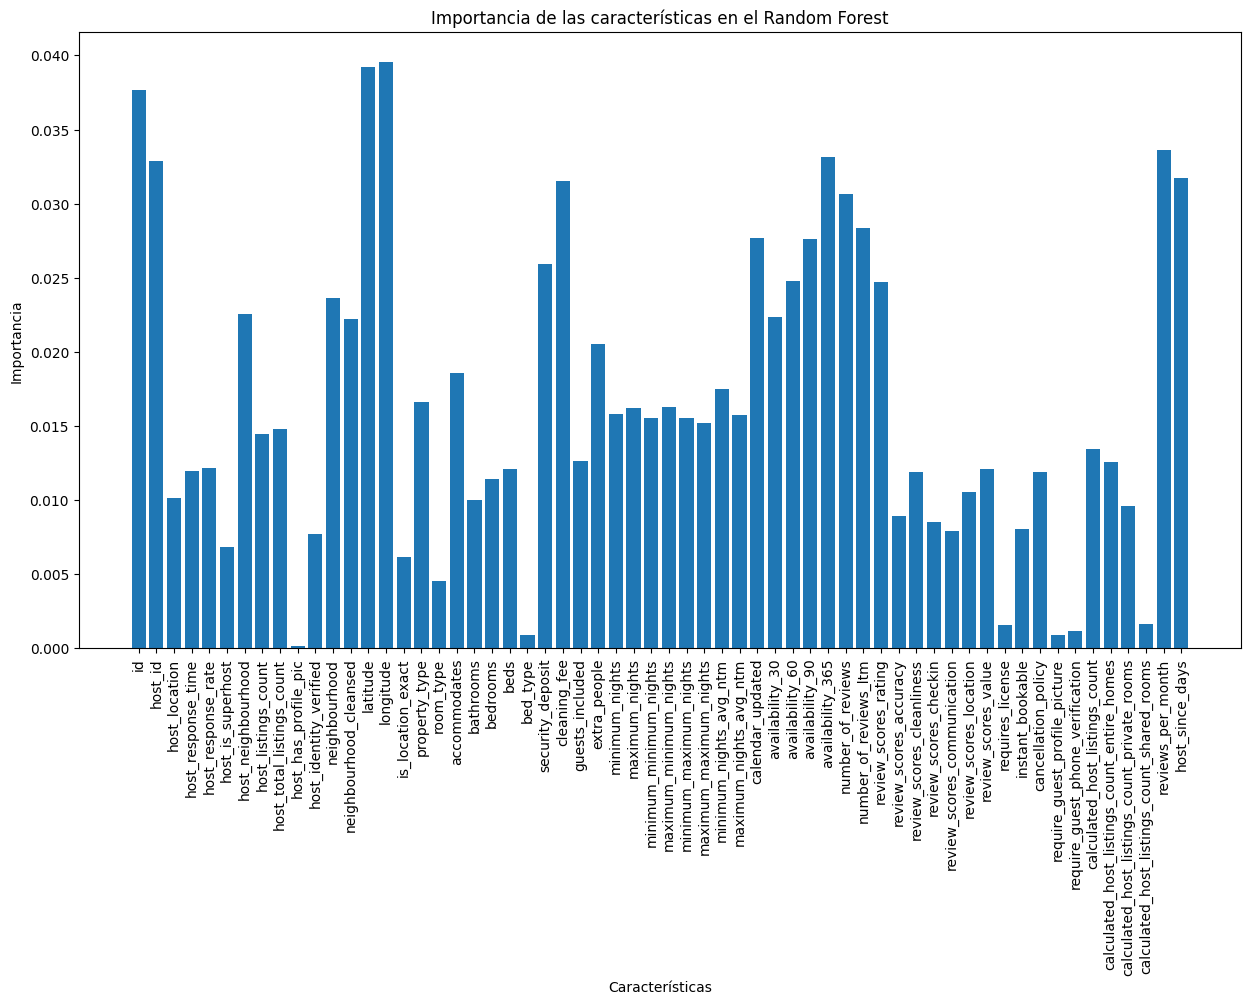

In [68]:
# Obtener la importancia de cada característica
importances = rf.feature_importances_

# Visualizar la importancia de las características
plt.figure(figsize=(15, 8))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las características en el Random Forest")
plt.show()

GRADIENT BOOSTING

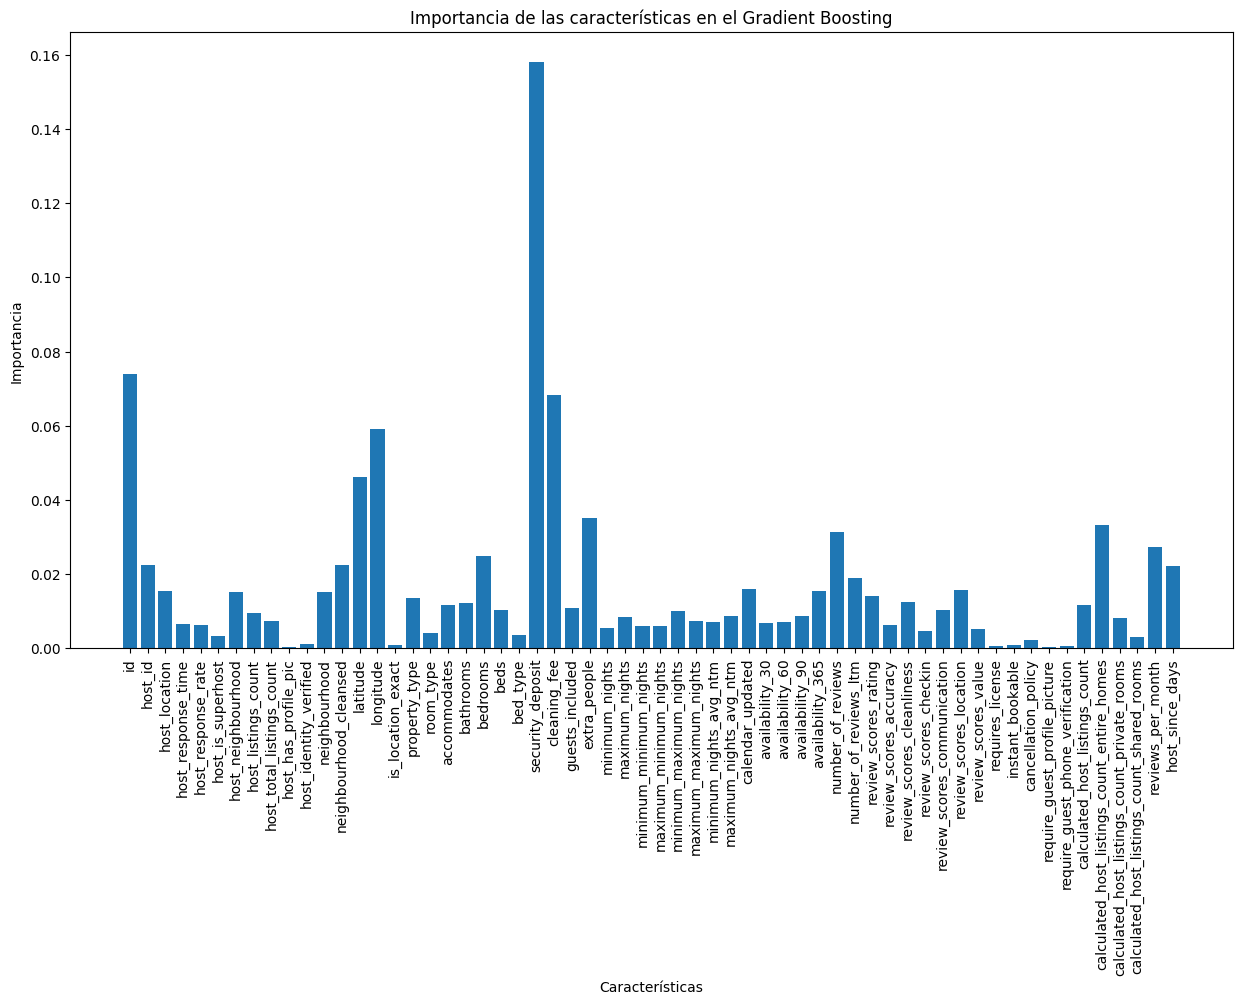

In [69]:
# Obtener la importancia de cada característica
importances = gb.feature_importances_

# Visualizar la importancia de las características
plt.figure(figsize=(15, 8))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las características en el Gradient Boosting")
plt.show()


Al comparar las variables de mayor importancia para Random Forest y Gradient Boosting, se pueden observar diferencias interesantes en términos de las características que influyen más en cada modelo.

Para Random Forest, las variables más importantes son longitud, latitud, reseñas por mes y número de reseñas. Estas variables tienen una importancia relativa entre 0.03 y 0.04 en comparación con otras variables.

En el caso de Gradient Boosting, las variables más importantes son depósito de seguridad, tarifa de limpieza, latitud y longitud. En este modelo, la variable security deposit destaca significativamente con una importancia de 0.16, mientras que las otras tres variables tienen una importancia relativa entre 0.05 y 0.07.

Estas diferencias en las variables de mayor importancia reflejan las características y el funcionamiento de cada modelo. Random Forest se basa en la construcción de múltiples árboles de decisión y combina sus predicciones, por lo que las variables relacionadas con la ubicación (longitude y latitude) y las relacionadas con las reseñas (reseñas por mes y número de reseñas) pueden tener un impacto significativo en las predicciones.

Por otro lado, Gradient Boosting se enfoca en mejorar el rendimiento de los modelos débiles mediante la combinación secuencial de múltiples modelos, y en este caso, las variables relacionadas con el depósito de seguridad, tarifa de limpieza y ubicación (latitude y longitude) parecen tener una mayor influencia en las predicciones.